<a href="https://colab.research.google.com/github/ArifcanOnay/Aco_Yol_Optimizasyonu/blob/main/S%C4%B1cakl%C4%B1k%C3%96devi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 1.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pygad/pygad.py:753: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


Optimizasyon başlatılıyor...
------------------------------
En İyi x1 (Süre): 59.93 dk
En İyi x2 (Sıcaklık): 61.22 °C
Maksimum Verim (y): 585.79
------------------------------


/usr/local/lib/python3.12/dist-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


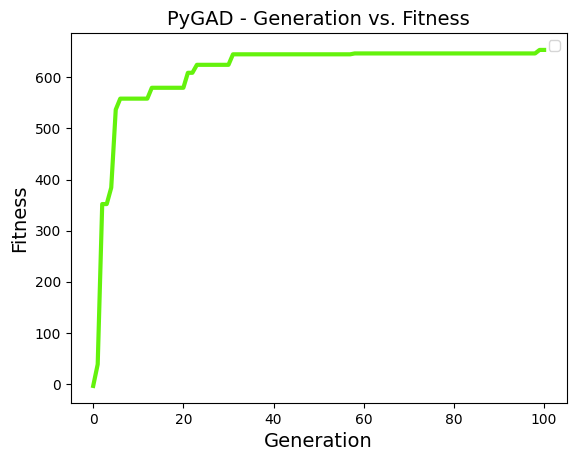

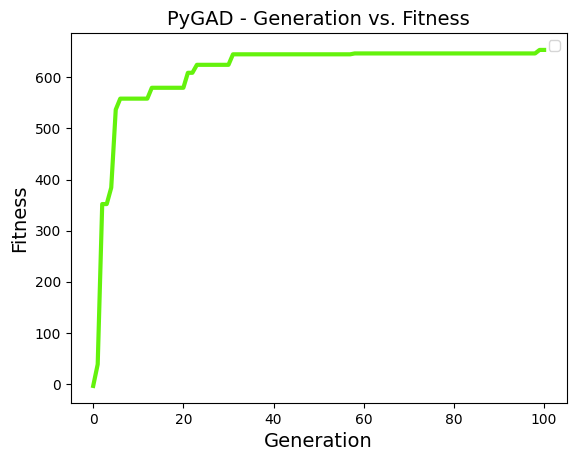

In [ ]:

!pip install pygad -q

import pygad
import numpy as np

# 2. Amaç Fonksiyonu (Fitness Function) Tanımlama
def fitness_func(ga_instance, solution, solution_idx):
    x1, x2 = solution

    # Kısıt 1: x1 + x2 <= 140
    # Kısıt 2: x2 >= 60
    # Değişken sınırları zaten GA parametrelerinde (gene_space) tanımlı
    if (x1 + x2 > 140) or (x2 < 60):
        # Kısıtlar ihlal edilirse çok düşük bir fitness değeri döndür (Ceza)
        fitness = -99999
    else:
        # Amaç fonksiyonu: y = 8x1 + 3x2 - x1*x2 + x1^2
        fitness = 8*x1 + 3*x2 - (x1*x2) + (x1**2)

    return fitness

#  Genetik Algoritma Parametrelerini Ayarlama
# x1 için [10, 60], x2 için [40, 120] aralıkları
gene_space = [{'low': 10, 'high': 60}, {'low': 40, 'high': 120}]

ga_instance = pygad.GA(
    num_generations=100,          # Toplam nesil sayısı
    num_parents_mating=10,        # Her nesilde eşleşecek ebeveyn sayısı
    fitness_func=fitness_func,    # Yukarıda yazdığımız fonksiyon
    sol_per_pop=50,               # Her nesildeki birey sayısı
    num_genes=2,                  # x1 ve x2 olmak üzere 2 değişkenimiz var
    gene_space=gene_space,        # Değişkenlerin değer aralıkları
    parent_selection_type="sss",  # Steady-state selection
    keep_parents=2,               # En iyi 2 ebeveyni koru
    crossover_type="single_point",# Tek noktalı çaprazlama
    mutation_type="random",       # Rastgele mutasyon
    mutation_percent_genes=10     # Mutasyon olasılığı
)

#  Algoritmayı Çalıştır
print("Optimizasyon başlatılıyor...")
ga_instance.run()

#  Sonuçları Görüntüle
solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("-" * 30)
print(f"En İyi x1 (Süre): {solution[0]:.2f} dk")
print(f"En İyi x2 (Sıcaklık): {solution[1]:.2f} °C")
print(f"Maksimum Verim (y): {solution_fitness:.2f}")
print("-" * 30)

#  Gelişim grafiğini çizdirme
ga_instance.plot_fitness()